In [ ]:

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Defense/data/Satkhira Preprocessed .csv')
df.head()

,YEAR,DAY,PRECIPITATION(mm/d),WIND_SPEED(m/s),RELATIVE_HUMIDITY(%),DEW(%),TEMP_MAX,TEMP_MIN,TEMPERATURE,Crop
0,2010,1,0.0,1.86,67.92,9.80,23.59,9.48,15.71,5
1,2010,2,0.0,1.91,66.92,9.16,24.19,8.33,15.28,5
2,2010,3,0.0,1.90,62.66,8.43,25.23,8.50,15.56,5
3,2010,4,0.0,1.46,56.28,6.43,24.27,7.87,15.14,5
4,2010,5,0.0,1.79,61.09,8.59,24.52,10.02,16.11,5


In [ ]:
df['Crop'].unique()

array([5, 4, 2, 3, 1])

In [ ]:
df['Crop'].value_counts()

1    2133
3     613
2     593
4     523
5     297
Name: Crop, dtype: int64

In [ ]:
df.columns=df.columns.str.strip()

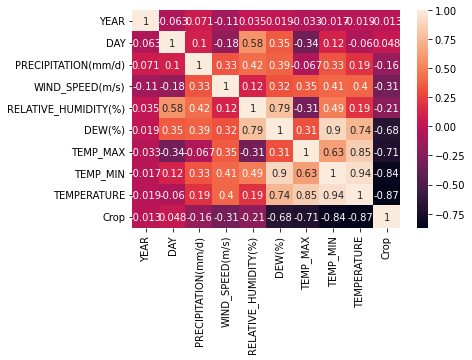

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
features = df[['PRECIPITATION(mm/d)', 'WIND_SPEED(m/s)','RELATIVE_HUMIDITY(%)','DEW(%)', 'TEMP_MAX', 'TEMP_MIN', 'TEMPERATURE']]
target = df['Crop']
labels = df['Crop']
features

,PRECIPITATION(mm/d),WIND_SPEED(m/s),RELATIVE_HUMIDITY(%),DEW(%),TEMP_MAX,TEMP_MIN,TEMPERATURE
0,0.00,1.86,67.92,9.80,23.59,9.48,15.71
1,0.00,1.91,66.92,9.16,24.19,8.33,15.28
2,0.00,1.90,62.66,8.43,25.23,8.50,15.56
3,0.00,1.46,56.28,6.43,24.27,7.87,15.14
4,0.00,1.79,61.09,8.59,24.52,10.02,16.11
...,...,...,...,...,...,...,...
4154,0.26,2.61,46.60,21.53,42.16,28.63,34.55
4155,0.37,3.43,54.49,23.46,40.22,29.12,33.76
4156,0.58,3.35,53.37,23.57,41.17,28.54,34.26
4157,1.25,3.22,57.28,23.71,37.91,29.51,33.13


In [ ]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)


DecisionTrees's Accuracy is:  93.99038461538461


[[417   0  17   0   0]
 [  0 114   3   2   0]
 [ 14   3 107   0   0]
 [  0   4   0  89   0]
 [  0   0   0   7  55]]
              precision    recall  f1-score   support

           1       0.97      0.96      0.96       434
           2       0.94      0.96      0.95       119
           3       0.84      0.86      0.85       124
           4       0.91      0.96      0.93        93
           5       1.00      0.89      0.94        62

    accuracy                           0.94       832
   macro avg       0.93      0.93      0.93       832
weighted avg       0.94      0.94      0.94       832



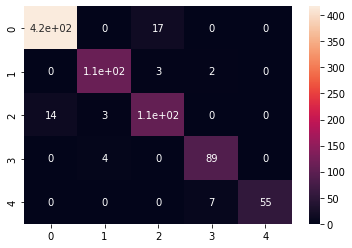

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Ytest,predicted_values))
print(classification_report(Ytest,predicted_values))
sns.heatmap(confusion_matrix(Ytest,predicted_values),annot=True)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.90625   , 0.91225962, 0.92788462, 0.9375    , 0.94464501])

In [ ]:
import pickle
DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x*100)

Naive Bayes's Accuracy is:  0.8846153846153846


[[417   0  17   0   0]
 [  0 102   1  16   0]
 [ 35  17  72   0   0]
 [  0   4   0  86   3]
 [  0   0   0   3  59]]
              precision    recall  f1-score   support

           1       0.92      0.96      0.94       434
           2       0.83      0.86      0.84       119
           3       0.80      0.58      0.67       124
           4       0.82      0.92      0.87        93
           5       0.95      0.95      0.95        62

    accuracy                           0.88       832
   macro avg       0.86      0.85      0.86       832
weighted avg       0.88      0.88      0.88       832



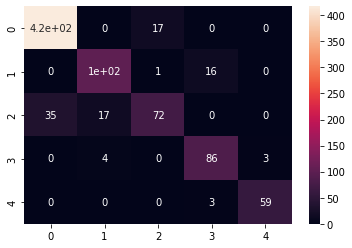

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Ytest,predicted_values))
print(classification_report(Ytest,predicted_values))
sns.heatmap(confusion_matrix(Ytest,predicted_values),annot=True)

In [ ]:

score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.84855769, 0.86418269, 0.85456731, 0.87620192, 0.8700361 ])

In [ ]:
import pickle
NB_pkl_filename = 'NBClassifier.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()

In [ ]:
from sklearn.svm import SVC
SVM = SVC(gamma='auto')
SVM.fit(Xtrain,Ytrain)
predicted_values = SVM.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x*100)

SVM's Accuracy is:  0.8918269230769231


[[422   0  12   0   0]
 [  5 100   6   8   0]
 [ 35   6  83   0   0]
 [  5   4   0  82   2]
 [  1   0   0   6  55]]
              precision    recall  f1-score   support

           1       0.90      0.97      0.94       434
           2       0.91      0.84      0.87       119
           3       0.82      0.67      0.74       124
           4       0.85      0.88      0.87        93
           5       0.96      0.89      0.92        62

    accuracy                           0.89       832
   macro avg       0.89      0.85      0.87       832
weighted avg       0.89      0.89      0.89       832



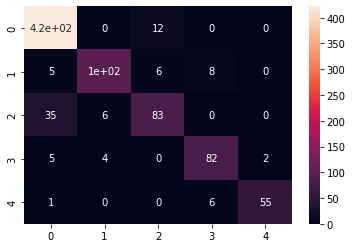

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Ytest,predicted_values))
print(classification_report(Ytest,predicted_values))
sns.heatmap(confusion_matrix(Ytest,predicted_values),annot=True)

In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.890625  , 0.86418269, 0.88942308, 0.87740385, 0.87364621])

In [ ]:
import pickle
SVM_pkl_filename = 'SVC.pkl'
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
SVM_Model_pkl.close()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 27)
knn.fit(Xtrain,Ytrain)
predicted_values = knn.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('KNN')

[[432   0   2   0   0]
 [  0 105   5   9   0]
 [ 55   9  60   0   0]
 [  0  11   0  82   0]
 [  0   0   0   7  55]]
              precision    recall  f1-score   support

           1       0.89      1.00      0.94       434
           2       0.84      0.88      0.86       119
           3       0.90      0.48      0.63       124
           4       0.84      0.88      0.86        93
           5       1.00      0.89      0.94        62

    accuracy                           0.88       832
   macro avg       0.89      0.83      0.85       832
weighted avg       0.88      0.88      0.87       832



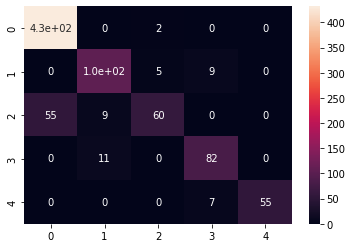

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Ytest,predicted_values))
print(classification_report(Ytest,predicted_values))
sns.heatmap(confusion_matrix(Ytest,predicted_values),annot=True)

In [ ]:
# Cross validation score (KNeighborsClassifier)
score = cross_val_score(knn,features,target,cv=5)
score

array([0.85456731, 0.85216346, 0.86177885, 0.86177885, 0.87484958])

In [ ]:
import pickle
KNN_pkl_filename = 'KNeighborsClassifier.pkl'
KNN_Model_pkl = open(KNN_pkl_filename, 'wb')
pickle.dump(knn, KNN_Model_pkl)
KNN_Model_pkl.close()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)
predicted_values = RF.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

RF's Accuracy is:  0.9411057692307693


[[418   0  16   0   0]
 [  0 116   1   2   0]
 [ 14   4 106   0   0]
 [  0   3   0  88   2]
 [  0   0   0   7  55]]
              precision    recall  f1-score   support

           1       0.97      0.96      0.97       434
           2       0.94      0.97      0.96       119
           3       0.86      0.85      0.86       124
           4       0.91      0.95      0.93        93
           5       0.96      0.89      0.92        62

    accuracy                           0.94       832
   macro avg       0.93      0.93      0.93       832
weighted avg       0.94      0.94      0.94       832



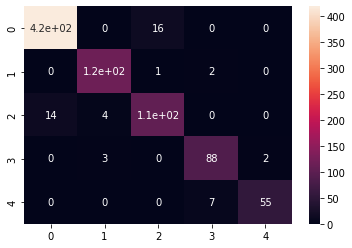

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Ytest,predicted_values))
print(classification_report(Ytest,predicted_values))
sns.heatmap(confusion_matrix(Ytest,predicted_values),annot=True)

In [ ]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.91225962, 0.92067308, 0.93629808, 0.93149038, 0.93501805])

In [ ]:
import pickle
RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
RF_Model_pkl.close()

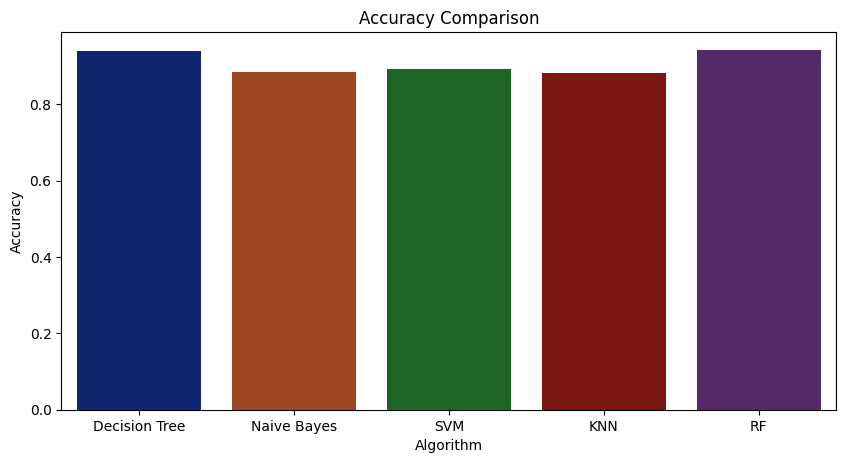

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x =model ,y =acc ,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9399038461538461
Naive Bayes --> 0.8846153846153846
SVM --> 0.8918269230769231
KNN --> 0.8822115384615384
RF --> 0.9411057692307693


In [ ]:
data = np.array([[0.6,2.3, 60.8, 15.65,25.88, 18.23,13.55]])
prediction = RF.predict(data)
print(prediction)

[4]
